In [1]:
import matplotlib.pyplot as plt
import simulated_parameter_vault
import simulated_pulse_sequence

In [2]:
%%time
simulated_pulse_sequence.initialize_julia()

Successfully initialized Julia and IonSim.jl
Wall time: 1min 9s


# Single-ion Rabi flopping

In [3]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 1)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "pmt")

In [4]:
%%time
rabi_result = simulated_pulse_sequence.run_simulation(
    "sequences/rabi_flopping.py",
    "RabiFlopping",
    {
        "RabiFlopping-Scan_Selection": "RabiFlopping.duration",
        "RabiFlopping:RabiFlopping.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 10e-6,
            "npoints": 50
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-22\RabiFlopping\1025_27_results_RabiFlopping.txt
Wall time: 26.8 s


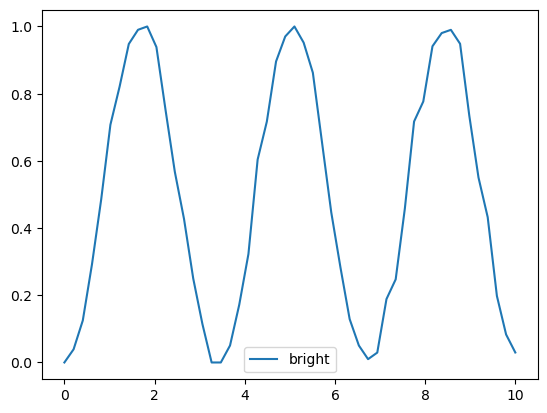

In [5]:
x = rabi_result['RabiFlopping']['x'] * 1e6
y = rabi_result['RabiFlopping']['y'][0]

plt.plot(x, y, label='bright')
plt.legend()
plt.show()

In [6]:
print(rabi_result)

{'RabiFlopping': {'x': array([0.00000000e+00, 2.04081633e-07, 4.08163265e-07, 6.12244898e-07,
       8.16326531e-07, 1.02040816e-06, 1.22448980e-06, 1.42857143e-06,
       1.63265306e-06, 1.83673469e-06, 2.04081633e-06, 2.24489796e-06,
       2.44897959e-06, 2.65306122e-06, 2.85714286e-06, 3.06122449e-06,
       3.26530612e-06, 3.46938776e-06, 3.67346939e-06, 3.87755102e-06,
       4.08163265e-06, 4.28571429e-06, 4.48979592e-06, 4.69387755e-06,
       4.89795918e-06, 5.10204082e-06, 5.30612245e-06, 5.51020408e-06,
       5.71428571e-06, 5.91836735e-06, 6.12244898e-06, 6.32653061e-06,
       6.53061224e-06, 6.73469388e-06, 6.93877551e-06, 7.14285714e-06,
       7.34693878e-06, 7.55102041e-06, 7.75510204e-06, 7.95918367e-06,
       8.16326531e-06, 8.36734694e-06, 8.57142857e-06, 8.77551020e-06,
       8.97959184e-06, 9.18367347e-06, 9.38775510e-06, 9.59183673e-06,
       9.79591837e-06, 1.00000000e-05]), 'y': [array([0.        , 0.03921569, 0.125     , 0.29245283, 0.48543689,
       0.70

# Two-ion MS gate

In [7]:
simulated_parameter_vault.set_parameter(["IonsOnCamera", "ion_number"], 2)
simulated_parameter_vault.set_parameter(["StateReadout", "readout_mode"], "camera_states")

simulated_parameter_vault.set_parameter(["MolmerSorensen", "detuning"], -8e3)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "detuning_carrier_1"], 1e3)
simulated_parameter_vault.set_parameter(["MolmerSorensen", "bichro_enable"], True)

In [8]:
%%time
ms_result = simulated_pulse_sequence.run_simulation(
    "sequences/molmer_sorensen.py",
    "MolmerSorensenGate",
    {
        "MolmerSorensen-Scan_Selection": "MolmerSorensen.duration",
        "MolmerSorensen:MolmerSorensen.duration": {
            "ty": "RangeScan",
            "start": 0,
            "stop": 100e-6,
            "npoints": 30
        },
    },
)

Results written to D:\Repos\pulse-sequence-simulator\data\simulation\2021-08-22\MolmerSorensenGate\1025_54_results_MolmerSorensen.txt
Wall time: 10.6 s


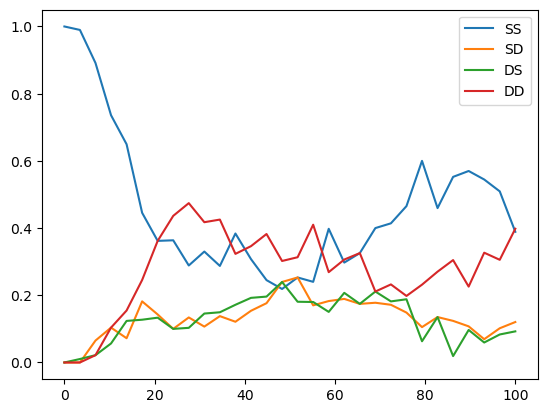

In [9]:
x = ms_result['MolmerSorensen']['x'] * 1e6
ds = ms_result['MolmerSorensen']['y'][0]
ss = ms_result['MolmerSorensen']['y'][1]
sd = ms_result['MolmerSorensen']['y'][2]
dd = ms_result['MolmerSorensen']['y'][3]

plt.plot(x, ss, label='SS')
plt.plot(x, sd, label='SD')
plt.plot(x, ds, label='DS')
plt.plot(x, dd, label='DD')
plt.legend()
plt.show()

In [10]:
print(ms_result)

{'RabiFlopping': {'x': [], 'y': []}, 'MolmerSorensen': {'x': array([0.00000000e+00, 3.44827586e-06, 6.89655172e-06, 1.03448276e-05,
       1.37931034e-05, 1.72413793e-05, 2.06896552e-05, 2.41379310e-05,
       2.75862069e-05, 3.10344828e-05, 3.44827586e-05, 3.79310345e-05,
       4.13793103e-05, 4.48275862e-05, 4.82758621e-05, 5.17241379e-05,
       5.51724138e-05, 5.86206897e-05, 6.20689655e-05, 6.55172414e-05,
       6.89655172e-05, 7.24137931e-05, 7.58620690e-05, 7.93103448e-05,
       8.27586207e-05, 8.62068966e-05, 8.96551724e-05, 9.31034483e-05,
       9.65517241e-05, 1.00000000e-04]), 'y': [array([0.        , 0.01030928, 0.02173913, 0.05660377, 0.12371134,
       0.12727273, 0.13333333, 0.1       , 0.10309278, 0.14563107,
       0.14942529, 0.17171717, 0.19230769, 0.19607843, 0.23958333,
       0.18072289, 0.18      , 0.15053763, 0.20720721, 0.1744186 ,
       0.21111111, 0.18181818, 0.18811881, 0.06315789, 0.13513514,
       0.01904762, 0.09677419, 0.05940594, 0.08333333, 0.092